# Pillow

[![Index](https://img.shields.io/badge/Index-blue)](../index.ipynb)
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/digillia/Digillia-Colab/blob/main/tools/pillow.ipynb)

Pillow est une bibliothèque de code pour la manipulation des images en Python. Elle est particulièrement adaptée à l'usage dans les bloc-notes Jupyter.

- https://pillow.readthedocs.io/

In [1]:
!pip3 install -q -U Pillow

In [2]:
# Cette variable python est accessible depuis les commandes shell
work_directory = './pillow'

# Récupération des données (notamment pour Google Colab)
!curl --create-dirs -O --output-dir $work_directory "https://raw.githubusercontent.com/digillia/Digillia-Colab/main/data/solvay_1927.jpeg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  245k  100  245k    0     0  1091k      0 --:--:-- --:--:-- --:--:-- 1089k


In [21]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
%matplotlib inline

## Lecture et affichage d'une image

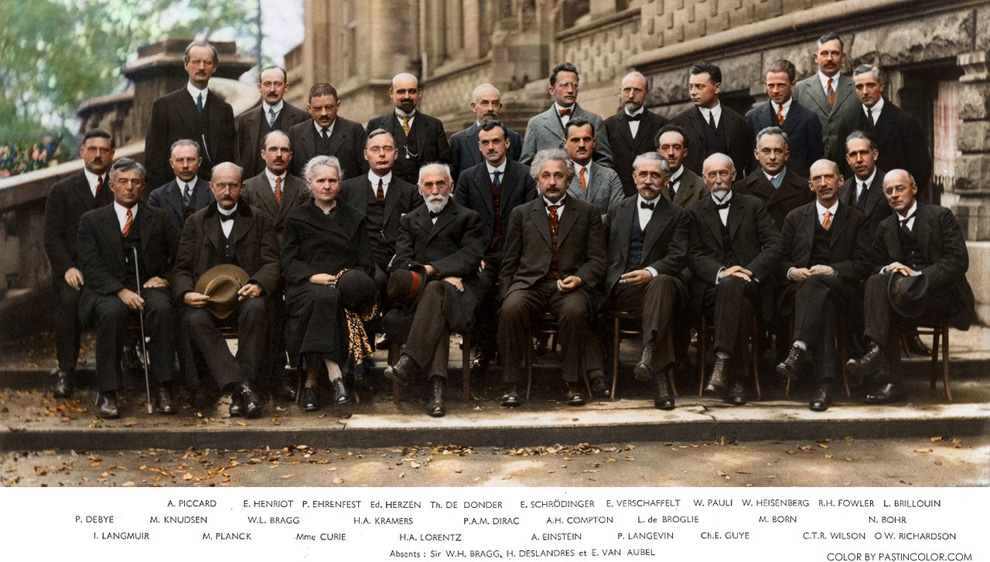

In [24]:
solvay_path = f'{work_directory}/solvay_1927.jpeg'
img = Image.open(solvay_path)
display(img)

## Séparation des canaux RVB

Text(0.5, 1.0, 'Fusion des canaux')

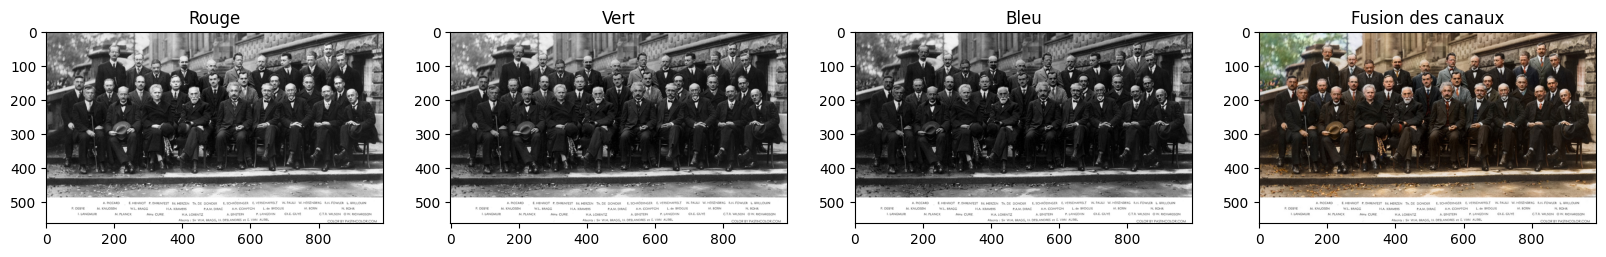

In [25]:
img = Image.open(solvay_path)
r, g, b = img.split()

# Affichage des canaux
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(r, cmap='gray'); plt.title('Rouge')
plt.subplot(142);plt.imshow(g, cmap='gray'); plt.title('Vert')
plt.subplot(143);plt.imshow(b, cmap='gray'); plt.title('Bleu')

# Fusionner les canaux dans une nouvelle image et afficher
merged = Image.merge('RGB', (r, g, b))
plt.subplot(144)
plt.imshow(merged)
plt.title('Fusion des canaux')

## Recadrage, redimensionnement, et inversion

In [26]:
img = Image.open(solvay_path)
img.size

(990, 562)

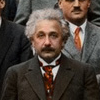

(100, 100)

In [27]:
# Recadrage
cropped = img.crop((505, 140, 605, 240))
display(cropped)
cropped.size

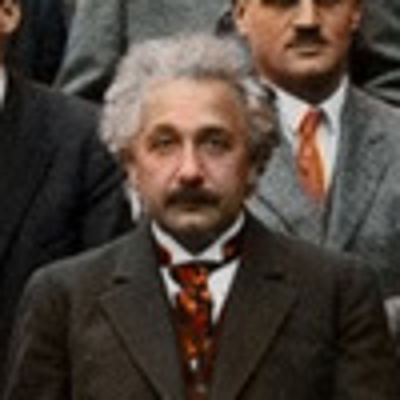

(400, 400)

In [28]:
# Redimensionnement
cropped_4x = cropped.resize((400, 400))
display(cropped_4x)
cropped_4x.size

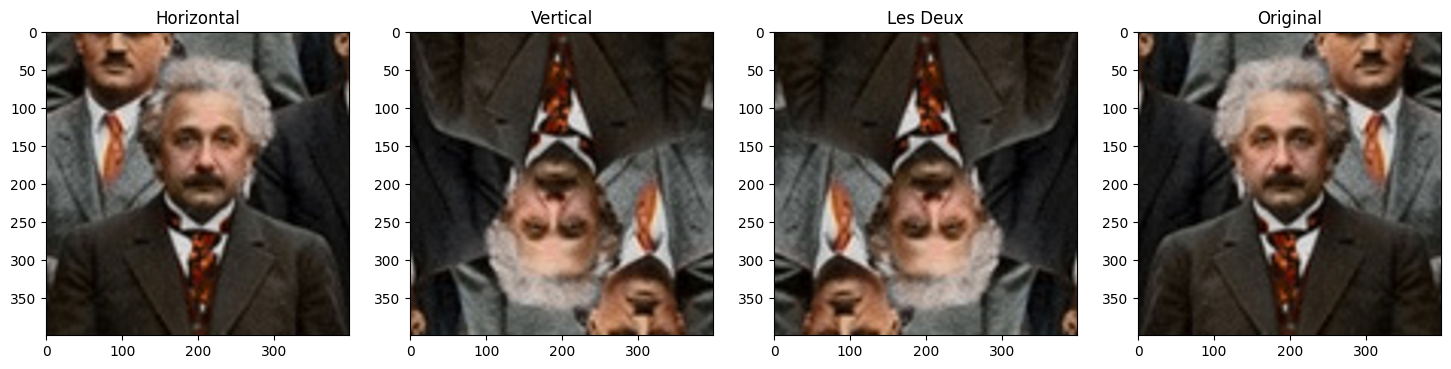

In [29]:
# Inversions
flipped_horz = cropped_4x.transpose(Image.FLIP_LEFT_RIGHT)
flipped_vert = cropped_4x.transpose(Image.FLIP_TOP_BOTTOM)
flipped_both = cropped_4x.transpose(Image.FLIP_LEFT_RIGHT).transpose(Image.FLIP_TOP_BOTTOM)

plt.figure(figsize=(18, 5))
plt.subplot(141);plt.imshow(flipped_horz);plt.title('Horizontal');
plt.subplot(142);plt.imshow(flipped_vert);plt.title('Vertical');
plt.subplot(143);plt.imshow(flipped_both);plt.title('Les Deux');
plt.subplot(144);plt.imshow(cropped_4x);plt.title('Original');

## Persistance d'image

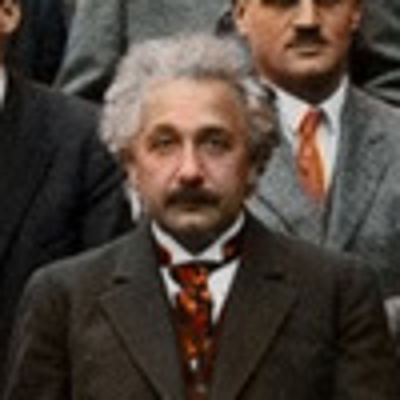

In [30]:
# Enregistrer une image
einstein_path = f'{work_directory}/einstein.png'
cropped_4x.save(einstein_path)
img = Image.open(einstein_path)
display(img)

## Annotations

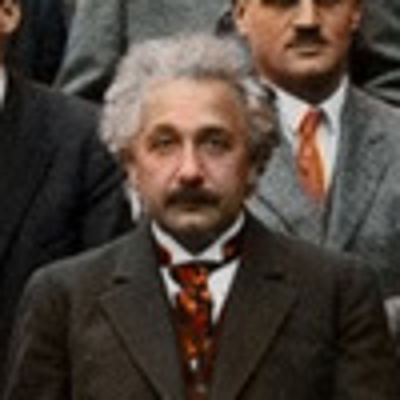

In [47]:
# Copie d'image
img = Image.open(einstein_path)
out = img.copy()
display(out)

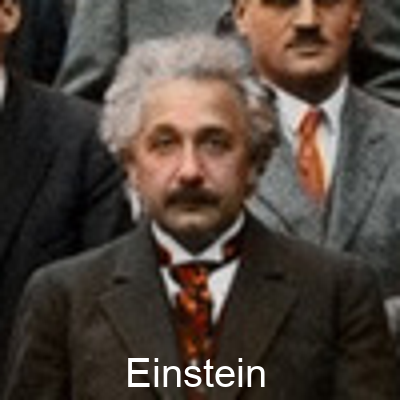

In [48]:
# Créer le contexte
ctx = ImageDraw.Draw(out)
# Charger la police de caractères
fnt = ImageFont.truetype('Arial.ttf', 40)
# Ajouter le texte
ctx.multiline_text((125, 350), "Einstein", font=fnt, fill=(255, 255, 255))
# Afficher le résultat
display(out)

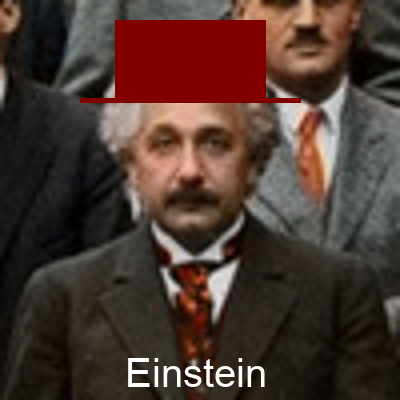

In [49]:
# Ajout de formes
ctx.line((80, 100, 300, 100), fill=128, width=5)
ctx.rectangle((115, 20, 265, 100), fill=128)
# Afficher le résultat
display(out)

In [ ]:
# Ménage
!rm -rf $work_directory